# Importando as bibliotecas e organizando os dados

In [ ]:
# Baixa as entradas X.npy
!gdown https://drive.google.com/uc?id=1oSRay8phFA91RJoGH0tMmj86LBovKj73

# Baixa as saídas desejadas Y.npy
!gdown https://drive.google.com/uc?id=1_BQLcsgcYYsubtv4M80BVm4BEknrTOr7

Downloading...
From: https://drive.google.com/uc?id=1oSRay8phFA91RJoGH0tMmj86LBovKj73
To: /content/X.npy
33.8MB [00:00, 92.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1_BQLcsgcYYsubtv4M80BVm4BEknrTOr7
To: /content/Y.npy
100% 165k/165k [00:00<00:00, 50.1MB/s]


In [ ]:
# Importa as principais bibliotecas que usaremos
import numpy as np
from matplotlib import pyplot as plt
import tensorflow.compat.v2 as tf
from sklearn.model_selection import train_test_split

In [ ]:
# Leitura dos dados
X = np.load('X.npy')
Y = np.load('Y.npy')

# Reordena as categorias na ordem correta
# (por motivo que desconheço, os dados
#  originais estavam com as classes fora
#  de ordem -- consistentes e organizadas,
#  mas fora de ordem)
cats = [9,0,7,6,1,8,4,3,2,5]
Y[:,cats] = Y[:,range(10)]

# 5 imagens aleatórias e suas etiquetas

Mostrando 0


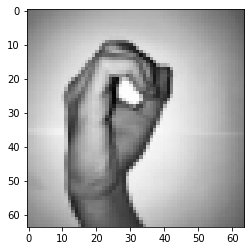

Mostrando 4


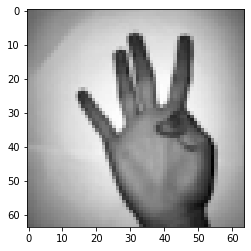

Mostrando 4


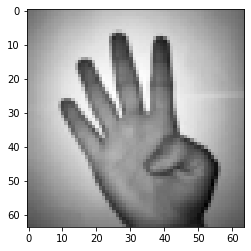

Mostrando 7


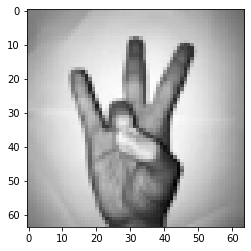

Mostrando 5


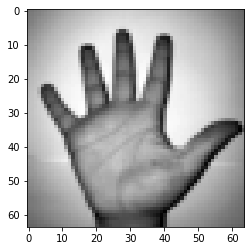

In [ ]:
# Total de amostras
total = X.shape[0]

# Mostramos aqui 5 amostras aleatórias
for i in range(5):
  k = np.random.randint(0,total)
  print('Mostrando',np.argmax(Y[k,:]))
  plt.imshow(X[k,:,:], cmap='gray')
  plt.show()

In [ ]:
# Aqui conferimos as dimensões dos dados
# dos pares de treinamento
print('X.shape =',X.shape)
print('Y.shape =',Y.shape)

X.shape = (2062, 64, 64)
Y.shape = (2062, 10)


# Embaralhando e separando 10% das amostras para o conjunto de validação


In [ ]:
# Função train_test_split é "uma mão na roda"
# Essa função já embaralha (shuffle) e separa dados
# de treinamento e validação.
X, X_test, Y, Y_test = train_test_split(X, Y, \
                                        test_size=int(total/10), \
                                        random_state=42)

# Verificando os vetores

In [ ]:

print('X.shape =',X.shape)
print('Y.shape =',Y.shape)
print('X_test.shape =',X_test.shape)
print('Y_test.shape =',Y_test.shape)

X.shape = (1856, 64, 64)
Y.shape = (1856, 10)
X_test.shape = (206, 64, 64)
Y_test.shape = (206, 10)


In [ ]:
X = X.reshape(X.shape[0], 64, 64, 1)
X_test = X_test.reshape(X_test.shape[0], 64, 64, 1)

In [ ]:
# Agora conferimos novamente as dimensões
print('X.shape =',X.shape)
print('Y.shape =',Y.shape)
print('X_test.shape =',X_test.shape)
print('Y_test.shape =',Y_test.shape)

X.shape = (1856, 64, 64, 1)
Y.shape = (1856, 10)
X_test.shape = (206, 64, 64, 1)
Y_test.shape = (206, 10)


# Treinando a rede neural

In [ ]:
p=0
p = tf.keras.models.Sequential([
      # Camada 1 Convolução
      tf.keras.layers.Conv2D(32, (5,5), activation='relu', input_shape=(64, 64, 1)),
      tf.keras.layers.MaxPooling2D(pool_size=(3, 3)),
      tf.keras.layers.Conv2D(64, (4,4), activation='relu'),
      tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
      # DropOut

      # Serialização
      tf.keras.layers.Flatten(),
      # Camada 6 Foward
      tf.keras.layers.Dense(128, activation='relu'),
      # Camada 7 Foward
      #tf.keras.layers.Dense(64, activation='relu'),
      # DropOut
      tf.keras.layers.Dropout(0.25),
      # Camada 8 Foward
      tf.keras.layers.Dense(10, activation='softmax')
    ]) 

p.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=['accuracy'],
)
  
h = p.fit(X, Y,
  batch_size=12, epochs=10,
  validation_data=(X_test, Y_test), verbose = 0,shuffle=True)

loss, accuracy = p.evaluate(X, Y, verbose=0)

print('Taxa de acerto nos dados de treinamento:', \
      100*accuracy, '%')

loss, accuracy = p.evaluate(X_test, Y_test, verbose=0)

print('Taxa de acerto nos dados de validação:', \
      100*accuracy, '%')

Taxa de acerto nos dados de treinamento: 99.62284564971924 %
Taxa de acerto nos dados de validação: 95.63106894493103 %


In [ ]:
h.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

# Saída de alguns neurônios da rede neural

In [ ]:
k = np.random.randint(X_test.shape[0])
data_test = np.reshape(X_test[k,:,:,0],(1,64,64,1))
print('Número',str(np.argmax(Y_test[k,:])))
nplt =4;

Número 9


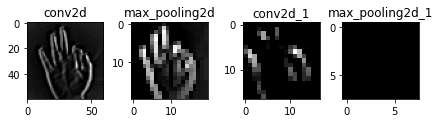

In [ ]:
fig, ax = plt.subplots(ncols=nplt, constrained_layout=True)
for n in range(nplt):
  n_layer = n
  intermediate_layer_model = tf.keras.models.Model(inputs=p.input, outputs=p.get_layer(p.layers[n_layer].name).output)
  intermediate_output = intermediate_layer_model.predict(data_test)
  k = np.random.randint(intermediate_output.shape[3])
  ax[n].imshow(intermediate_output[0,:,:,k]*255.0,cmap='gray')
  ax[n].set_title( str(p.layers[n_layer].name)  )

# Acurracy e Loss function


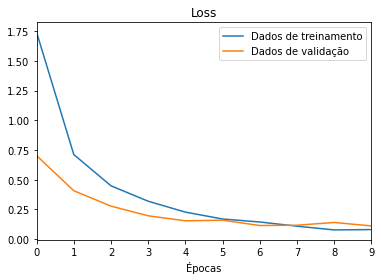

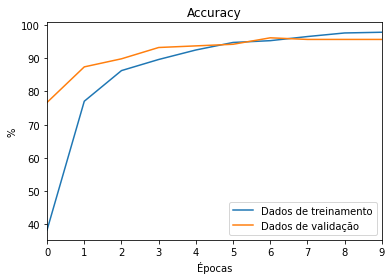

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.legend(('Dados de treinamento','Dados de validação'))
plt.xlim((0,len(h.history['val_loss'])-1))
plt.title('Loss')
plt.xlabel('Épocas')
plt.show()
plt.figure()
plt.plot(np.dot(h.history['accuracy'],100.0))
plt.plot(np.dot(h.history['val_accuracy'],100.0))
plt.xlim((0,len(h.history['val_accuracy'])-1))
plt.legend(('Dados de treinamento','Dados de validação'))
plt.title('Accuracy')
plt.xlabel('Épocas')
plt.ylabel('%')
plt.show()


# 10 imagens aleatórias para comparar a saída correta e a predição

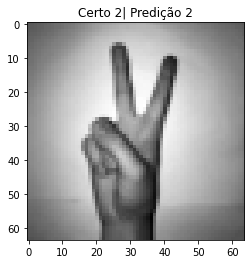

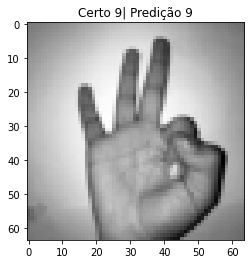

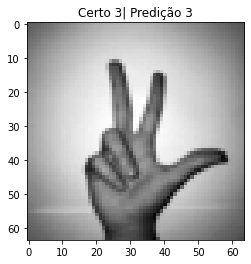

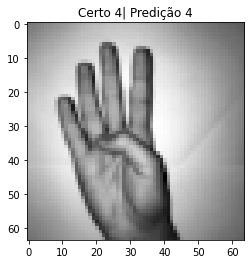

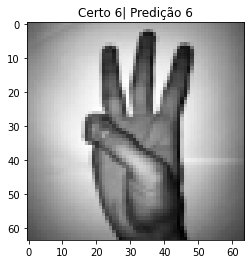

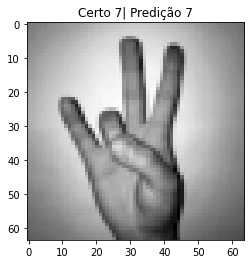

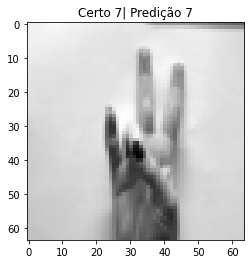

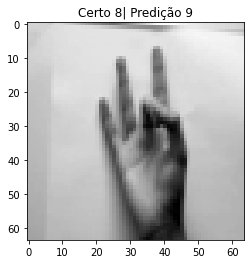

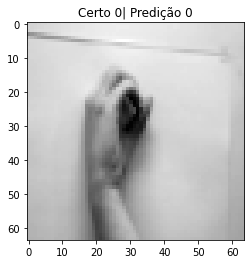

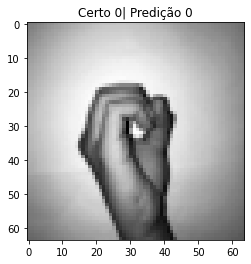

In [ ]:
for na in range(10):
  idx = np.random.randint(X_test.shape[0])
  data = X_test[idx,:,:,0]
  plt.figure()
  plt.imshow(data,cmap='gray')
  data = np.reshape(data,(1,64,64,1))
  plt.title(str('Certo ' + str(np.argmax(Y_test[idx,:])) + '| Predição ' + str(np.argmax(p.predict(data)))))
  plt.show()


# Testando o modelo 10 Vezes

Taxa de acerto nos dados de treinamento: 99.78448152542114 %
Taxa de acerto nos dados de validação: 96.11650705337524 %


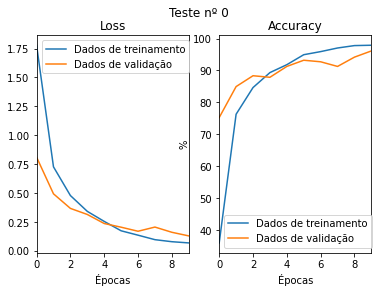

Taxa de acerto nos dados de treinamento: 98.86853694915771 %
Taxa de acerto nos dados de validação: 93.20388436317444 %


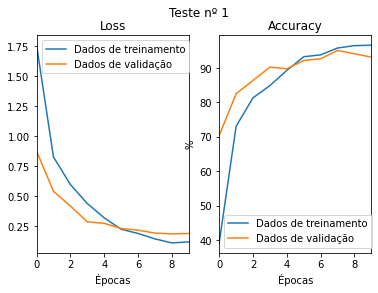

Taxa de acerto nos dados de treinamento: 99.03017282485962 %
Taxa de acerto nos dados de validação: 92.71844625473022 %


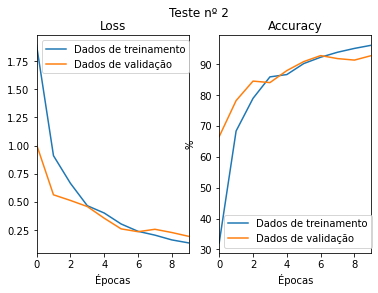

Taxa de acerto nos dados de treinamento: 99.40732717514038 %
Taxa de acerto nos dados de validação: 95.63106894493103 %


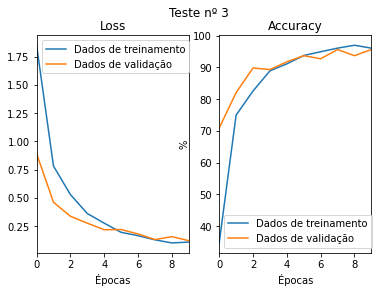

Taxa de acerto nos dados de treinamento: 99.8383641242981 %
Taxa de acerto nos dados de validação: 93.68932247161865 %


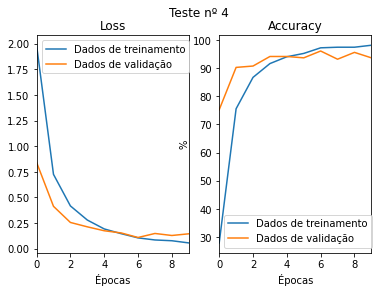

Taxa de acerto nos dados de treinamento: 99.13793206214905 %
Taxa de acerto nos dados de validação: 92.71844625473022 %


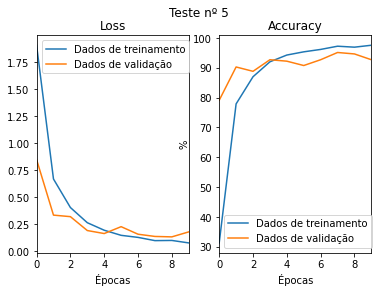

Taxa de acerto nos dados de treinamento: 99.24569129943848 %
Taxa de acerto nos dados de validação: 93.20388436317444 %


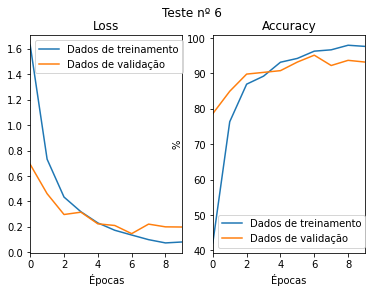

Taxa de acerto nos dados de treinamento: 97.35991358757019 %
Taxa de acerto nos dados de validação: 92.23300814628601 %


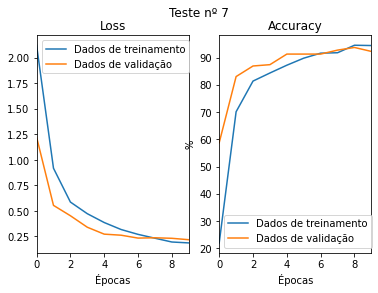

Taxa de acerto nos dados de treinamento: 99.8383641242981 %
Taxa de acerto nos dados de validação: 96.11650705337524 %


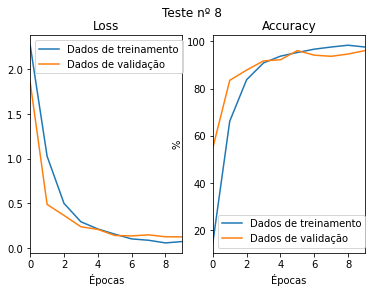

Taxa de acerto nos dados de treinamento: 99.62284564971924 %
Taxa de acerto nos dados de validação: 97.57281541824341 %


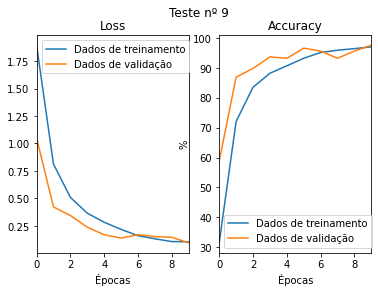

In [ ]:
test = []

for n_test in range(10):
    # Leitura dos dados
  X = np.load('X.npy')
  Y = np.load('Y.npy')

  # Reordena as categorias na ordem correta
  # (por motivo que desconheço, os dados
  #  originais estavam com as classes fora
  #  de ordem -- consistentes e organizadas,
  #  mas fora de ordem)
  cats = [9,0,7,6,1,8,4,3,2,5]
  Y[:,cats] = Y[:,range(10)]
  total = X.shape[0]
  # Função train_test_split é "uma mão na roda"
  # Essa função já embaralha (shuffle) e separa dados
  # de treinamento e validação.
  X, X_test, Y, Y_test = train_test_split(X, Y, \
                                          test_size=int(total/10), \
                                          random_state=42)
  X = X.reshape(X.shape[0], 64, 64, 1)
  X_test = X_test.reshape(X_test.shape[0], 64, 64, 1)

  p=0
  p = tf.keras.models.Sequential([
        # Camada 1 Convolução
        tf.keras.layers.Conv2D(32, (5,5), activation='relu', input_shape=(64, 64, 1)),
        tf.keras.layers.MaxPooling2D(pool_size=(3, 3)),
        tf.keras.layers.Conv2D(64, (4,4), activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        # DropOut

        # Serialização
        tf.keras.layers.Flatten(),
        # Camada 6 Foward
        tf.keras.layers.Dense(128, activation='relu'),
        # Camada 7 Foward
        #tf.keras.layers.Dense(64, activation='relu'),
        # DropOut
        tf.keras.layers.Dropout(0.25),
        # Camada 8 Foward
        tf.keras.layers.Dense(10, activation='softmax')
      ]) 

  p.compile(
      loss='categorical_crossentropy',
      optimizer=tf.keras.optimizers.Adam(0.001),
      metrics=['accuracy'],
  )
    
  h = p.fit(X, Y,
    batch_size=12, epochs=10,
    validation_data=(X_test, Y_test), verbose = 0,shuffle=True)

  loss, accuracy = p.evaluate(X, Y, verbose=0)

  print('Taxa de acerto nos dados de treinamento:', \
        100*accuracy, '%')

  loss, accuracy = p.evaluate(X_test, Y_test, verbose=0)

  print('Taxa de acerto nos dados de validação:', \
        100*accuracy, '%')
  test.append(h)


  import matplotlib.pyplot as plt

  fig, (ax1, ax2) = plt.subplots(1, 2)
  fig.suptitle('Teste nº ' + str(n_test))
  ax1.plot(h.history['loss'])
  ax1.plot(h.history['val_loss'])
  ax1.legend(('Dados de treinamento','Dados de validação'))
  ax1.set_xlim((0,len(h.history['val_loss'])-1))
  ax1.set_title('Loss')
  ax1.set_xlabel('Épocas')

  ax2.plot(np.dot(h.history['accuracy'],100.0))
  ax2.plot(np.dot(h.history['val_accuracy'],100.0))
  ax2.set_xlim((0,len(h.history['val_accuracy'])-1))
  ax2.legend(('Dados de treinamento','Dados de validação'))
  ax2.set_title('Accuracy')
  ax2.set_xlabel('Épocas')
  ax2.set_ylabel('%')
  plt.show()
